### https://docs.juliacn.com/latest/manual/metaprogramming/#嵌套引用<br>

In [6]:
str_ex = Meta.parse(":(1+2)")
@show str_ex
@show eval(str_ex)

@show str_ex == :(1+2)
@show str_ex == :(:(1+2))

str_ex = :($(Expr(:quote, :(1 + 2))))
eval(str_ex) = :(1 + 2)
str_ex == $(Expr(:quote, :(1 + 2))) = false
str_ex == $(Expr(:quote, :($(Expr(:quote, :(1 + 2)))))) = true


true

+ $ 相当于 eval, 取值, **Expr构造函数 要执行了才会得到其要构造的表达式**
+ `$(Expr(...))` 结果为...所体现的表达式. 等于白干? 
+ 不是，因为要嵌入拼接到:(...)引用中，就如字符串嵌入字符串时要去掉引号一样:<br>
name = "Wang", "hello, Wang, how are you?"


In [2]:
dump(str_ex)

Expr
  head: Symbol quote
  args: Array{Any}((1,))
    1: Expr
      head: Symbol call
      args: Array{Any}((3,))
        1: Symbol +
        2: Int64 1
        3: Int64 2


In [9]:
eval(Expr(:quote, :(1 + 2))) |> display # 原始表达式的$相当于eval
dump(Expr(:quote, :(1 + 2)))
# Expr(:quote, :(1 + 2)) 指:(1 + 2)构成的表达式,即要外加一层
# 所以等价于 :(:(1+2))

# $(Expr(:quote, :(1 + 2))), Expr外加了 但又 $ 执行复原了，白加了
# 所以通过 :()再外加, 就得到原始parse结果

:(1 + 2)

Expr
  head: Symbol quote
  args: Array{Any}((1,))
    1: Expr
      head: Symbol call
      args: Array{Any}((3,))
        1: Symbol +
        2: Int64 1
        3: Int64 2


In [10]:
dump(:(:(1+2)))

Expr
  head: Symbol quote
  args: Array{Any}((1,))
    1: Expr
      head: Symbol call
      args: Array{Any}((3,))
        1: Symbol +
        2: Int64 1
        3: Int64 2


In [14]:
# 如上，所以，可以直接这样:  
direct_expr_ex = Expr(:quote, :(1 + 2))
# 末梢表达式优先由:(...)构造, 而不是Expr, 但两者是等价的

@show direct_expr_ex
@show direct_expr_ex == str_ex == 
:(:(1+2)) == 
Expr(:quote, Expr(:call, :+, 1,2))

direct_expr_ex = :($(Expr(:quote, :(1 + 2))))
direct_expr_ex == str_ex == $(Expr(:quote, :($(Expr(:quote, :(1 + 2)))))) == Expr(:quote, Expr(:call, :+, 1, 2)) = true


true

In [24]:
using TreeView

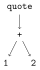

In [4]:
TreeView.walk_tree(str_ex)

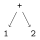

In [ ]:
TreeView.walk_tree(:(1+2))

### **如下为笔者测试**

In [ ]:
@show Expr(:quote, 1 + 2)
@show Expr(:quote, :a + 2)

Expr(:quote, 1 + 2) = :($(Expr(:quote, 3)))


MethodError: MethodError: no method matching +(::Symbol, ::Int64)
The function `+` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...)
   @ Base operators.jl:596
  +(!Matched::Base.CoreLogging.LogLevel, ::Integer)
   @ Base logging\logging.jl:132
  +(!Matched::Complex{Bool}, ::Real)
   @ Base complex.jl:323
  ...


In [ ]:
@show Expr(:quote, :a + :b)

MethodError: MethodError: no method matching +(::Symbol, ::Symbol)
The function `+` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...)
   @ Base operators.jl:596
  +(!Matched::Base.CoreLogging.LogLevel, !Matched::Integer)
   @ Base logging\logging.jl:132
  +(!Matched::Bool, !Matched::Complex{Bool})
   @ Base complex.jl:308
  ...


In [1]:
a=1
@show Expr(:quote, :($a) + :($b))


UndefVarError: UndefVarError: `b` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [2]:
@show Expr(:quote, :($a) + :(3))
eval(Expr(:quote, :($a) + :(3)))

Expr(:quote, $(Expr(:quote, :($(Expr(:$, :a))))) + $(QuoteNode(3))) = :($(Expr(:quote, 4)))


4

In [3]:
@show Expr(:quote,:(1)+:(2))
@show eval(Expr(:quote,:(1)+:(2)))
@show eval(:(1+2))

println("\n")
@show :(1)
@show Expr(:quote,$QuoteNode(1)+$QuoteNode(2))

Expr(:quote, $(QuoteNode(1)) + $(QuoteNode(2))) = :($(Expr(:quote, 3)))
eval(Expr(:quote, $(QuoteNode(1)) + $(QuoteNode(2)))) = 3
eval($(Expr(:quote, :(1 + 2)))) = 3


$(QuoteNode(1)) = 1


ErrorException: syntax: "$" expression outside quote around show.jl:1237

In [ ]:
dump(:(:(1+2))) # 重复:(的head才是quote

Expr
  head: Symbol quote
  args: Array{Any}((1,))
    1: Expr
      head: Symbol call
      args: Array{Any}((3,))
        1: Symbol +
        2: Int64 1
        3: Int64 2


In [ ]:
a =  
6
a

6

In [4]:
# :(:(:(1+2)))
cube_ex = Expr(:quote, Expr(:quote,:(1+2)))
indirect_cube_ex = 
:(
    $(Expr(
        :quote,

        :(
            $(Expr(:quote,:(1+2)))
        )

    ))
)
@show cube_ex==indirect_cube_ex

cube_ex == indirect_cube_ex = true


true

In [5]:
dump(:(:(:(1+2))))

Expr
  head: Symbol quote
  args: Array{Any}((1,))
    1: Expr
      head: Symbol quote
      args: Array{Any}((1,))
        1: Expr
          head: Symbol call
          args: Array{Any}((3,))
            1: Symbol +
            2: Int64 1
            3: Int64 2


### https://docs.juliacn.com/latest/manual/metaprogramming/#嵌套引用<br>

help?>Meta.quot<br>
  `Meta.quot(ex)::Expr`<br>
  Quote expression ex to produce an expression with head quote.
```julia
eval(Meta.quot(:x))      
  :x
  
dump(Meta.quot(:x))      
  Expr
    head: Symbol quote
    args: Array{Any}((1,))        
      1: Symbol x
  
eval(Meta.quot(:(1+2)))  
  :(1 + 2)
```

`Expr(:quote)` is the one intended for user interaction and metaprogramming. `QuoteNode` is quite primitive and doesn't support, for instance, interpolation. Therefore, **macros only see `Expr(:quote)`**, and that is the intended behaviour.<br>
是用于用户交互和元编程的。非常原始，并且不支持，例如，插值。因此，宏只能看到，这是预期的行为。

In [3]:
x = :(1 + 2)
quote_ex = quote $x end
Base.remove_linenums!(quote_ex)
dump(quote_ex)

Expr
  head: Symbol block
  args: Array{Any}((1,))
    1: Expr
      head: Symbol call
      args: Array{Any}((3,))
        1: Symbol +
        2: Int64 1
        3: Int64 2


In [3]:
Expr(:block, Expr(:call, :+, 1, 2))

quote
    1 + 2
end

自然地，引用表达式可以包含在其它引用表达式中。插值在这些情形中的工作方式可能会有点难以理解。考虑这个例子：

In [1]:
quote_quote_ex = quote quote $x end end
Base.remove_linenums!(quote_quote_ex)

quote_quote_ex |> display

dump(quote_quote_ex)

quote
    $(Expr(:quote, quote
    $(Expr(:$, :x))
end))
end

Expr
  head: Symbol block
  args: Array{Any}((1,))
    1: Expr
      head: Symbol quote
      args: Array{Any}((1,))
        1: Expr
          head: Symbol block
          args: Array{Any}((1,))
            1: Expr
              head: Symbol $
              args: Array{Any}((1,))
                1: Symbol x


Notice that the result contains `$x`, which means that `x` has not been evaluated yet. In other words, the $ expression "belongs to" the inner quote expression, and so its argument is only evaluated when the inner quote expression is:<br>

注意，结果包含 $x ，这意味着还没有计算 x 。换句话说， $ 表达式“属于”内部引号表达式，因此只有当内部引号表达式为：

In [4]:
eval(quote_quote_ex)

quote
    1 + 2
end

但是，外部 `quote` 表达式可以把值插入到内部引用表达式的 `$` 中去。这通过多个 `$` 实现：

In [5]:
quote quote $$x end end

quote
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y132sZmlsZQ==.jl:1 =#
    $(Expr(:quote, quote
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y132sZmlsZQ==.jl:1 =#
    $(Expr(:$, :(1 + 2)))
end))
end

Notice that `(1 + 2)` now appears in the result instead of the symbol `x`. Evaluating this expression yields an interpolated `3`:<br>
注意，现在在结果中出现了 `(1 + 2)` 而不是符号 `x` 。对这个表达式求值会得到插值后的 `3` ：

In [7]:
eval(quote quote $$x end end)

quote
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y135sZmlsZQ==.jl:1 =#
    3
end

这种行为背后的直觉是每个 插值`$` 都将 `x` 插值求值一遍：**一个 `$` 工作方式类似于 `eval(:x)`**，其返回 `x` 的值，而两个 `$` 行为相当于 `eval(eval(:x))`。

In [30]:
TreeView.walk_tree(quote_quote_ex)

LabelledTree({5, 4} directed simple Int64 graph, Any[:block, :quote, :block, :$, :x])

! Extra }, or forgotten $.
<recently read> \egroup 
        
l.48 }
    ;


In [8]:
quote_quote_expr_ex = 
Expr(:block, 
     Expr(:quote,
          Expr(:block,
               Expr(:$, :x)
              )
          )
    )

quote
    $(Expr(:quote, quote
    $(Expr(:$, :x))
end))
end

In [10]:
quote_quote_ex2 =
quote 
    quote $x end
end
Base.remove_linenums!(quote_quote_ex2)

quote
    $(Expr(:quote, quote
    $(Expr(:$, :x))
end))
end

In [14]:
quote_quote_ex_format =
quote
    $(
        Expr(:quote, 
              quote 
                $(Expr(:$, :x)) 
                # Expr(:$, :x) 取x的值 :(1+2), 有Expr了 代替一个冒号，
                # 所以eval结果是 quote 1+2 end (见后面)
              end
            )
     )
end

Base.remove_linenums!(quote_quote_ex_format)

quote
    $(Expr(:quote, quote
    $(Expr(:$, :x))
end))
end

In [60]:
quote_quote_ex_format_simplify = :(:(1+2)) # TODO 究竟几个冒号还不清楚

:($(Expr(:quote, :(1 + 2))))

In [69]:
dump(:(:(1+2)))

Expr
  head: Symbol quote
  args: Array{Any}((1,))
    1: Expr
      head: Symbol call
      args: Array{Any}((3,))
        1: Symbol +
        2: Int64 1
        3: Int64 2


In [70]:
quote $(Expr(:quote, :(1+2))) end

quote
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y115sZmlsZQ==.jl:1 =#
    $(Expr(:quote, :(1 + 2)))
end

In [36]:
quote_quote_ex_format2 =
:(
    $(
        Expr(:quote, 
              quote 
                $(Expr(:$, :x)) 
                # Expr(:$, :x) 取x的值 :(1+2), 有Expr了 代替一个冒号，
                # 所以eval结果是 quote 1+2 end (见后面)
              end
            )
     )
)

Base.remove_linenums!(quote_quote_ex_format2)

:($(Expr(:quote, quote
    $(Expr(:$, :x))
end)))

In [11]:
@show quote_quote_ex == quote_quote_expr_ex == quote_quote_ex2

quote_quote_ex == quote_quote_expr_ex == quote_quote_ex2 = true


true

In [67]:
eval(quote_quote_ex_format_simplify)

:(1 + 2)

In [68]:
eval(quote_quote_ex)

quote
    1 + 2
end

In [77]:
eval(quote_quote_ex_format2)
# 能看懂这种开头啦: ($(Expr(:quote, quote $(Expr(:$, :x)) end)))

quote
    1 + 2
end

In [78]:
eval(quote quote 1+2 end end) 
# $x 表达式插值 相当于是拼接, x=:(1+2), 插值时要如此去掉最外层colon : 

quote
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y116sZmlsZQ==.jl:1 =#
    1 + 2
end

In [17]:
eval(eval(quote_quote_ex))

3

In [18]:
x

:(1 + 2)

In [79]:
quote_quote_ex2 = quote quote :(1 + 2) end end
Base.remove_linenums!(quote_quote_ex2)
# dump(quote_quote_ex2)

quote
    $(Expr(:quote, quote
    $(Expr(:quote, :(1 + 2)))
end))
end

In [80]:
quote_quote_ex2_format =
quote
    $(
        Expr(:quote, 
              quote
              $(Expr(:quote, :(1 + 2)))
              end
            )
     )
end
Base.remove_linenums!(quote_quote_ex2_format)

quote
    $(Expr(:quote, quote
    $(Expr(:quote, :(1 + 2)))
end))
end

In [81]:
quote_quote_ex2_format_simplify = :(:(:(1+2)))  # TODO 究竟几个冒号还不清楚

:($(Expr(:quote, :($(Expr(:quote, :(1 + 2)))))))

In [85]:
eval(eval(quote_quote_ex2_format_simplify))

:(1 + 2)

In [86]:
eval(eval(quote_quote_ex2_format))

:(1 + 2)

In [24]:
quote_quote_ex3 = quote quote $$x end end
Base.remove_linenums!(quote_quote_ex3)
quote_quote_ex3 |> display

quote
    $(Expr(:quote, quote
    $(Expr(:$, :(1 + 2)))
end))
end

In [25]:
dump(quote_quote_ex3)

Expr
  head: Symbol block
  args: Array{Any}((1,))
    1: Expr
      head: Symbol quote
      args: Array{Any}((1,))
        1: Expr
          head: Symbol block
          args: Array{Any}((1,))
            1: Expr
              head: Symbol $
              args: Array{Any}((1,))
                1: Expr


In [26]:
quote_quote_expr_ex2=
Expr(:block,
     Expr(:quote,
          Expr(:block,
               Expr(:$,
                    Expr(:$, :x)
               )
          )
     )
)

quote
    $(Expr(:quote, quote
    $(Expr(:$, :($(Expr(:$, :x)))))
end))
end

In [27]:
eval(quote_quote_expr_ex2)

ErrorException: syntax: "$" expression outside quote

In [29]:
quote_quote_expr_ex3=
Expr(:block,
     Expr(:quote,
          Expr(:block,
               Expr(:$,
                    Expr(:call, :+, 1, 2) 
                    # $x 取表达式:(1+2), Expr形式时Expr替换一个冒号
                    # Expr(:call, :+, 1, 2) = :(1+2) 末梢少拆一个Expr
               )
          )
     )
)

quote
    $(Expr(:quote, quote
    $(Expr(:$, :(1 + 2)))
end))
end

In [31]:
quote_quote_expr_ex3=
Expr(:block,
     Expr(:quote,
          Expr(:block,
               Expr(:$, :(1+2))
               )
          )
     )

quote
    $(Expr(:quote, quote
    $(Expr(:$, :(1 + 2)))
end))
end

In [40]:
quote_quote_expr_ex3_format =
quote
    $(
        Expr(:quote, 
             quote
                  $(Expr(:$, :(1 + 2)))
             end)
    )
end
Base.remove_linenums!(quote_quote_expr_ex3_format)

quote
    $(Expr(:quote, quote
    $(Expr(:$, :(1 + 2)))
end))
end

In [35]:
@show quote_quote_ex3==quote_quote_expr_ex2
@show quote_quote_ex3==quote_quote_expr_ex3

eval(quote_quote_expr_ex3)

quote_quote_ex3 == quote_quote_expr_ex2 = false
quote_quote_ex3 == quote_quote_expr_ex3 = true


quote
    3
end

In [87]:
Expr(:block, Expr(:$, :x))

quote
    $(Expr(:$, :x))
end

In [ ]:
Expr(:block, :x)

quote
    x
end

In [ ]:
quote :(1 + 2) end

quote
    #= e:\Projects.jl\Training.jl\9. Expr\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X62sZmlsZQ==.jl:1 =#
    $(Expr(:quote, :(1 + 2)))
end

这种行为背后的直觉是每个 `$` 都将 x 求值一遍：一个 `$` 工作方式类似于 `eval(:x)`，其返回 `x` 的值，而两个 `$` 行为相当于 `eval(eval(:x))`。

https://riptutorial.com/julia-lang/example/24364/quotenode--meta-quot--and-expr--quote-

In [ ]:
macro mysym(); :x; end
@mysym

UndefVarError: UndefVarError: `x` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [ ]:
# macroexpand(Main, :(@mysym))  |> display
@macroexpand @mysym

:(Main.x)

In [ ]:
macro mysym2(); Meta.quot(:x); end
@mysym2

:x

In [ ]:
@macroexpand @mysym2

:(:x)

In [ ]:
Meta.show_sexpr(Meta.quot(:x))
println("\n")
dump(Meta.quot(:x))

(:quote, :x)

Expr
  head: Symbol quote
  args: Array{Any}((1,))
    1: Symbol x


In [ ]:
macro mysym3(); :(:x); end
@mysym3

:x

In [ ]:
Meta.show_sexpr(:(:x)) 
println("\n")
dump(:(:x))

(:quote, #QuoteNode
  :x
)

QuoteNode
  value: Symbol x


In [ ]:
@show QuoteNode(:x) == Expr(:quote, :x)
@show eval(QuoteNode(:x)) == eval(Expr(:quote, :x))
eval(Expr(:quote, :x))

QuoteNode(:x) == Expr(:quote, :x) = false
eval(QuoteNode(:x)) == eval(Expr(:quote, :x)) = true


:x